In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# To see all the columns 
pd.set_option('display.max_columns', 85)
pd.set_option('display.max_rows', 600)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [18]:
df= pd.read_csv("C:\\CompletePython\\DataScience\VisionZero\\2016\\crashes_datetime4.csv")

In [19]:
df.head()

,Unnamed: 0,person_type,person_injury,person_age,ejection,position_in_vehicle,safety_equipment,ped_role,person_sex,vehicle_type,vehicle_make,vehicle_year,vehicle_occupants,driver_sex,driver_license_status,pre_crash,point_of_impact,vehicle_damage,contributing_factor_1,contributing_factor_2,borough,zip_code,latitude,longitude,on_street_name,collision_id,number_of_contributing_vehicles,crash_date_year,crash_date_month,crash_date_day,hour
0,2,OCCUPANT,NOT INJURED,52.0,NOT EJECTED,DRIVER,LAP BELT & HARNESS,DRIVER,M,UNSPECIFIED,UNSPECIFIED,UNSPECIFIED,UNSPECIFIED,M,UNSPECIFIED,NOT_AVALIBLE,NOT_AVALIBLE,NOT_AVALIBLE,NOT_AVALIBLE,NOT_AVALIBLE,QUEENS,11378.0,40.725560,-73.89849,LONG ISLAND EXPRESSWAY,4230635,2,2019,10,26,16
1,15,OCCUPANT,NOT INJURED,41.0,NOT EJECTED,DRIVER,LAP BELT,DRIVER,M,UNSPECIFIED,UNSPECIFIED,UNSPECIFIED,UNSPECIFIED,M,UNSPECIFIED,NOT_AVALIBLE,NOT_AVALIBLE,NOT_AVALIBLE,NOT_AVALIBLE,NOT_AVALIBLE,MANHATTAN,10025.0,40.793377,-73.97086,AMSTERDAM AVENUE,4230398,2,2019,10,26,20
2,17,OCCUPANT,NOT INJURED,35.0,NOT EJECTED,DRIVER,LAP BELT,DRIVER,M,UNSPECIFIED,UNSPECIFIED,UNSPECIFIED,UNSPECIFIED,M,UNSPECIFIED,NOT_AVALIBLE,NOT_AVALIBLE,NOT_AVALIBLE,NOT_AVALIBLE,NOT_AVALIBLE,MANHATTAN,10025.0,40.793377,-73.97086,AMSTERDAM AVENUE,4230398,2,2019,10,26,20
3,19,OCCUPANT,NOT INJURED,17.0,NOT EJECTED,RIGHT REAR PASSENGER OR MOTORCYCLE SIDECAR PAS...,LAP BELT & HARNESS,PASSENGER,F,UNSPECIFIED,UNSPECIFIED,UNSPECIFIED,UNSPECIFIED,F,UNSPECIFIED,NOT_AVALIBLE,NOT_AVALIBLE,NOT_AVALIBLE,NOT_AVALIBLE,NOT_AVALIBLE,BROOKLYN,11230.0,40.611960,-73.96816,AVENUE O,4230632,2,2019,10,25,1
4,21,OCCUPANT,INJURED,26.0,NOT EJECTED,"FRONT PASSENGER, IF TWO OR MORE PERSONS, INCLU...",LAP BELT & HARNESS,PASSENGER,F,UNSPECIFIED,UNSPECIFIED,UNSPECIFIED,UNSPECIFIED,F,UNSPECIFIED,NOT_AVALIBLE,NOT_AVALIBLE,NOT_AVALIBLE,NOT_AVALIBLE,NOT_AVALIBLE,BROOKLYN,11230.0,40.611960,-73.96816,AVENUE O,4230632,2,2019,10,25,1


In [68]:
df['person_injury'].value_counts()

NOT INJURED    135069
INJURED         24012
Name: person_injury, dtype: int64

In [78]:
df1=df.drop(['collision_id','Unnamed: 0'], axis=1)

In [79]:
data = df1

In [80]:
from sklearn.preprocessing import LabelEncoder
gle = LabelEncoder()
data=data.apply(LabelEncoder().fit_transform)

In [81]:
data.head()

,person_type,person_injury,person_age,ejection,position_in_vehicle,safety_equipment,ped_role,person_sex,vehicle_type,vehicle_make,vehicle_year,vehicle_occupants,driver_sex,driver_license_status,pre_crash,point_of_impact,vehicle_damage,contributing_factor_1,contributing_factor_2,borough,zip_code,latitude,longitude,on_street_name,number_of_contributing_vehicles,crash_date_year,crash_date_month,crash_date_day,hour
0,1,1,52,2,2,11,0,1,143,640,77,42,1,3,11,9,9,24,24,3,188,10949,10055,2959,2,3,9,25,16
1,1,1,41,2,2,10,0,1,143,640,77,42,1,3,11,9,9,24,24,2,26,15714,4594,893,2,3,9,25,20
2,1,1,35,2,2,10,0,1,143,640,77,42,1,3,11,9,9,24,24,2,26,15714,4594,893,2,3,9,25,20
3,1,1,17,2,9,11,3,0,143,640,77,42,0,3,11,9,9,24,24,1,152,2186,4742,977,2,3,9,24,1
4,1,0,26,2,3,11,3,0,143,640,77,42,0,3,11,9,9,24,24,1,152,2186,4742,977,2,3,9,24,1


In [82]:
data.shape

(159081, 29)

In [89]:
X=data[['person_age', 'person_type','ejection', 'position_in_vehicle', 'safety_equipment', 'ped_role', 'person_sex',
        'vehicle_type', 'vehicle_make', 'vehicle_year', 'driver_sex', 'driver_license_status', 'pre_crash',
        'point_of_impact', 'vehicle_damage', 'contributing_factor_1', 'contributing_factor_2',
       'borough', 'zip_code', 'latitude', 'longitude', 'on_street_name',
       'number_of_contributing_vehicles', 'crash_date_year',
       'crash_date_month', 'crash_date_day', 'hour']]  # Features

y=data['person_injury']  # Labels

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) # 75% training and 25% test

In [91]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

In [92]:
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [93]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8915290035452968


In [94]:
# Extract feature importances
fi = pd.DataFrame({'feature': list(X_train.columns),
                   'importance': clf.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [95]:
fi.head(22)

,feature,importance
0,person_age,0.083030
20,longitude,0.080763
19,latitude,0.080014
21,on_street_name,0.073348
1,person_type,0.062998
18,zip_code,0.061957
25,crash_date_day,0.061596
4,safety_equipment,0.061575
26,hour,0.059245
24,crash_date_month,0.047811


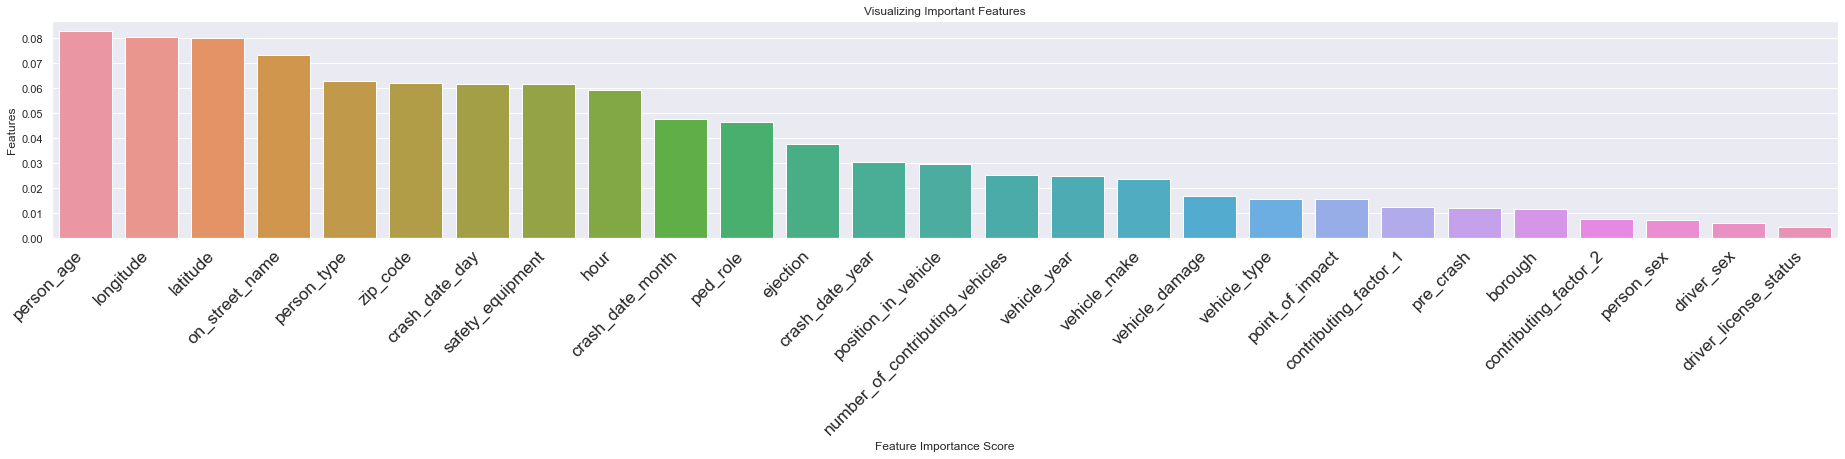

In [116]:
# Creating a bar plot
sns.barplot(x=fi.feature, y=fi.importance)
# Add labels to your
#sns.set(rc={"figure.figsize":(8, 4)})
sns.set(rc={"figure.figsize":(32, 8)})

plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.xticks(
    rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large"
)
plt.show()

# Balance the dataset

In [147]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 
print('Original dataset shape %s' % Counter(y_train))

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({1: 101239, 0: 18071})
Resampled dataset shape Counter({1: 101239, 0: 101239})


In [118]:
from sklearn .metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.35      0.49      5941
           1       0.90      0.99      0.94     33830

    accuracy                           0.89     39771
   macro avg       0.86      0.67      0.72     39771
weighted avg       0.88      0.89      0.87     39771



In [157]:
#Confusion Matrix
# from sklearn.metrics import confusion_matrix
# confusion_matrix(y_test,y_pred)

array([[ 2385,  3556],
       [ 1511, 32319]], dtype=int64)

In [121]:
from sklearn.utils.multiclass import unique_labels
unique_labels(y_test)
#combine these labels with the confusion metrix
def plot(y_true,y_pred):
    labels = unique_labels(y_test)
    column=[f'Predicted {label}' for label in labels]
    indexes=[f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true,y_pred), 
                         columns=column, index=indexes)
    
    return table

In [123]:
plot(y_test, y_pred)

,Predicted 0,Predicted 1
Actual 0,2104,3837
Actual 1,477,33353


In [143]:
#same plot as above but in heatmap

def plot2(y_true,y_pred):
    sns.set(rc={"figure.figsize":(8, 4)})
    labels = unique_labels(y_test)
    column=[f'Predicted {label}' for label in labels]
    indexes=[f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true,y_pred), 
                         columns=column, index=indexes)
    
    return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

<AxesSubplot:>

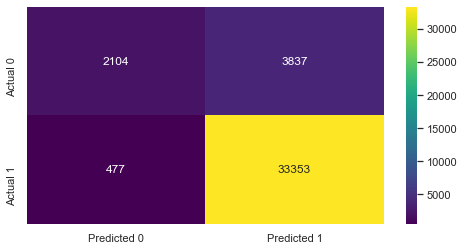

In [144]:
# plot2(y_test, y_pred)

In [145]:
X_res.head()

,person_age,person_type,ejection,position_in_vehicle,safety_equipment,ped_role,person_sex,vehicle_type,vehicle_make,vehicle_year,driver_sex,driver_license_status,pre_crash,point_of_impact,vehicle_damage,contributing_factor_1,contributing_factor_2,borough,zip_code,latitude,longitude,on_street_name,number_of_contributing_vehicles,crash_date_year,crash_date_month,crash_date_day,hour
0,42,1,2,2,11,0,1,110,609,48,1,0,4,13,13,9,50,0,96,18482,11880,1314,2,2,5,27,10
1,25,1,2,5,10,3,1,117,169,39,1,0,5,12,12,15,50,0,101,19370,11286,1007,2,0,11,2,23
2,0,1,2,3,11,3,0,110,387,38,0,0,1,14,14,5,50,1,156,2522,7202,2820,2,0,7,17,14
3,24,1,2,2,11,0,1,117,398,33,1,0,4,13,13,50,50,2,12,12277,4496,2278,2,1,2,10,22
4,57,1,2,9,16,3,0,117,80,49,1,0,5,3,3,15,50,0,92,18872,10547,4275,1,0,10,13,13


# Run the model on the balanced dataset


In [150]:
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_res,y_res)
y_pred=clf.predict(X_test)

In [156]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8725956098664857


In [158]:
confusion_matrix(y_test,y_pred)

array([[ 2385,  3556],
       [ 1511, 32319]], dtype=int64)

In [159]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.61      0.40      0.48      5941
           1       0.90      0.96      0.93     33830

    accuracy                           0.87     39771
   macro avg       0.76      0.68      0.71     39771
weighted avg       0.86      0.87      0.86     39771



<AxesSubplot:>

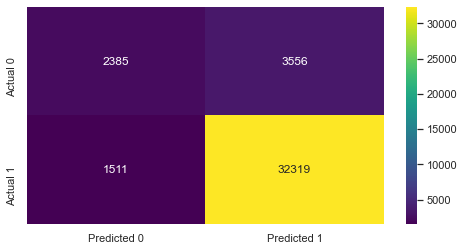

In [162]:
plot2(y_test, y_pred)

In [146]:
# # Features:  person_age, longitude, latitude, on_street_name, zip_code, crash_date_day, person_type
# X_res=X_res[['person_age', 'person_type',
#        'zip_code', 'latitude', 'longitude', 'on_street_name',
#         'crash_date_day']]  # Features


# Run the model on features below
Features:  person_age, longitude, latitude, on_street_name, zip_code, crash_date_day, person_type


In [167]:
X_res1=X_res[['person_age', 'person_type', 'zip_code', 'latitude', 'longitude', 'on_street_name','crash_date_day']] 
X_test1 = X_test[['person_age', 'person_type','zip_code', 'latitude', 'longitude', 'on_street_name', 'crash_date_day']]

In [168]:
clf.fit(X_res1,y_res)
y_pred=clf.predict(X_test1)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.829549168992482


In [170]:
confusion_matrix(y_test,y_pred)

array([[ 3033,  2908],
       [ 3871, 29959]], dtype=int64)

In [171]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.44      0.51      0.47      5941
           1       0.91      0.89      0.90     33830

    accuracy                           0.83     39771
   macro avg       0.68      0.70      0.69     39771
weighted avg       0.84      0.83      0.83     39771



<AxesSubplot:>

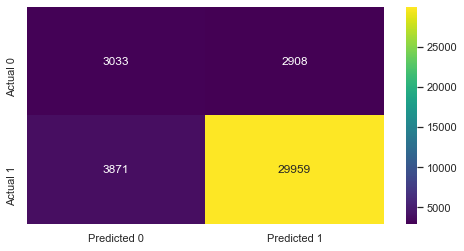

In [172]:
plot2(y_test, y_pred)

# Using VarainceThreshold to select features

In [173]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
print("Original feature shape:", X.shape)
new_X = selector.fit_transform(X)
print("Transformed feature shape:", new_X.shape)

Original feature shape: (159081, 27)
Transformed feature shape: (159081, 27)


# from sklearn.feature_selection import SelectKBest

In [175]:
from sklearn.feature_selection import SelectKBest
selector = SelectKBest()
print("Original feature shape:", X.shape)
new_X = selector.fit_transform(X, y)
print("Transformed feature shape:", new_X.shape)

Original feature shape: (159081, 27)
Transformed feature shape: (159081, 10)


In [181]:
X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.25)

In [184]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 
print('Original dataset shape %s' % Counter(y_train))

sm = SMOTE(random_state=42)
X_res2, y_res2 = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res2))

Original dataset shape Counter({1: 101337, 0: 17973})
Resampled dataset shape Counter({1: 101337, 0: 101337})


In [185]:
clf.fit(X_res2,y_res2)
y_pred=clf.predict(X_test)

In [186]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7501194337582661


In [187]:
confusion_matrix(y_test,y_pred)

array([[ 3360,  2679],
       [ 7259, 26473]], dtype=int64)

In [188]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.32      0.56      0.40      6039
           1       0.91      0.78      0.84     33732

    accuracy                           0.75     39771
   macro avg       0.61      0.67      0.62     39771
weighted avg       0.82      0.75      0.78     39771



<AxesSubplot:>

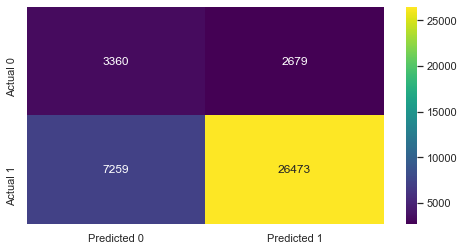

In [189]:
plot2(y_test, y_pred)